In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf
from sklearn.model_selection import train_test_split
import category_encoders as ce

In [2]:
# Load dataset.
df_input = pd.read_csv('./data/train.csv')
df_input.pop('Id')
# dfeval = pd.read_csv('')

0         1
1         2
2         3
3         4
4         5
       ... 
995     996
996     997
997     998
998     999
999    1000
Name: Id, Length: 1000, dtype: int64

In [3]:
df_input.head()

,BldgType,OverallQual,GrLivArea,GarageArea,SalePrice
0,1Fam,7,1710,548,208500
1,1Fam,6,1262,460,181500
2,1Fam,7,1786,608,223500
3,1Fam,7,1717,642,140000
4,1Fam,8,2198,836,250000


In [4]:
df_input.describe()

,OverallQual,GrLivArea,GarageArea,SalePrice
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.125000,1510.493000,473.350000,182284.451000
std,1.383217,512.296179,208.901597,80291.215207
min,1.000000,334.000000,0.000000,34900.000000
25%,5.000000,1125.750000,338.000000,130000.000000
50%,6.000000,1456.000000,480.000000,163995.000000
75%,7.000000,1774.250000,576.000000,215000.000000
max,10.000000,4676.000000,1390.000000,755000.000000


In [5]:
df_target = df_input.pop('SalePrice')

In [6]:
df_target.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [7]:
df_target.describe()

count      1000.000000
mean     182284.451000
std       80291.215207
min       34900.000000
25%      130000.000000
50%      163995.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [8]:
df_input.shape[0]

1000

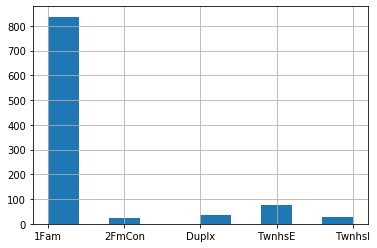

In [9]:
df_input.BldgType.hist()

1FAM is dominant

In [10]:
encoder = ce.OneHotEncoder(use_cat_names=True)
df_encoded = encoder.fit_transform(df_input)
df_encoded.head()

,BldgType_1Fam,BldgType_2FmCon,BldgType_Duplx,BldgType_TwnhsE,BldgType_TwnhsI,OverallQual,GrLivArea,GarageArea
0,1,0,0,0,0,7,1710,548
1,1,0,0,0,0,6,1262,460
2,1,0,0,0,0,7,1786,608
3,1,0,0,0,0,7,1717,642
4,1,0,0,0,0,8,2198,836


In [14]:
x_train, x_test, y_train, y_test = train_test_split(df_encoded, df_target, test_size=0.2)

In [19]:
x_train.tail()

,BldgType_1Fam,BldgType_2FmCon,BldgType_Duplx,BldgType_TwnhsE,BldgType_TwnhsI,OverallQual,GrLivArea,GarageArea
580,1,0,0,0,0,6,1429,572
506,1,0,0,0,0,8,1911,471
945,1,0,0,0,0,5,1869,456
275,1,0,0,0,0,7,1548,672
197,1,0,0,0,0,8,3112,795


In [16]:
x_test.shape[0]

200

In [17]:
y_train.shape[0]

800

In [18]:
y_test.shape[0]

200

In [ ]:
CATEGORICAL_COLUMNS = ['BldgType']
NUMERIC_COLUMNS = ['OverallQual', 'GrLivArea', 'GarageArea']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

In [ ]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

train_input_fn = make_input_fn(dftrain, y_train)
# eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

Inspect the dataset

In [ ]:
ds = make_input_fn(dftrain, y_train, batch_size=10)()
for feature_batch, label_batch in ds.take(1):
  print('Some feature keys:', list(feature_batch.keys()))
  print()
  print('A batch of class:', feature_batch['BldgType'].numpy())
  print()
  print('A batch of Labels:', label_batch.numpy())